# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



## Dataset Summary

**Source:** [Kaggle - Car Price Prediction Dataset](https://www.kaggle.com/datasets/prince7489/car-price-prediction-dataset)

**Collection Method:** This dataset contains information about used cars collected from various automotive marketplaces and dealerships. It includes vehicle specifications, condition metrics, and pricing data.

**Features in the Data:**
- **Brand/Make:** The manufacturer of the vehicle
- **Model:** Specific car model name
- **Year:** Manufacturing year
- **Price:** Selling price in USD
- **Mileage:** Total miles driven
- **Fuel Type:** Gasoline, Diesel, Electric, Hybrid
- **Transmission:** Manual or Automatic
- **Engine Size:** Engine displacement
- **Condition/Rating:** Overall vehicle condition

**Why This Dataset Interests Me:** Understanding what factors drive car prices is relevant to anyone buying or selling a vehicle. As someone who may purchase a used car in the future, I'm curious to see which features have the biggest impact on price - is it the brand, the age, the mileage, or something else? This analysis could provide practical insights for making informed purchasing decisions.

In [1]:
# Import libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the car price dataset
df = pd.read_csv('car_price_dataset_medium.csv')

# Display first few rows and basic info
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types and missing values:")
print(df.info())

First 5 rows:
   Car_ID     Brand  Model_Year  Kilometers_Driven Fuel_Type Transmission  \
0       1      Audi        2005             197018    Diesel       Manual   
1       2       BMW        2019              43467    Hybrid    Automatic   
2       3       Kia        2012             153697    Hybrid    Automatic   
3       4  Mercedes        2015              38893    Petrol    Automatic   
4       5      Audi        2016              81329    Hybrid    Automatic   

  Owner_Type  Engine_CC  Max_Power_bhp  Mileage_kmpl  Seats  Price_USD  
0      First       4046          223.6         29.61      6  119611.94  
1      First       3731          248.4         21.66      5   90842.46  
2      Third       4925          465.5         12.14      6   78432.24  
3     Second       3771          229.7         19.65      6   44568.89  
4      First       2817          573.2          7.74      5    8751.82  

Dataset shape: (1000, 12)

Column names:
['Car_ID', 'Brand', 'Model_Year', 'Kilomete

## Question 1: What is the average price of cars in this dataset, and what is the price range (min and max)?

Average car price: $59,217.25
Minimum price: $3,028.42
Maximum price: $119,611.94
Price range: $116,583.52


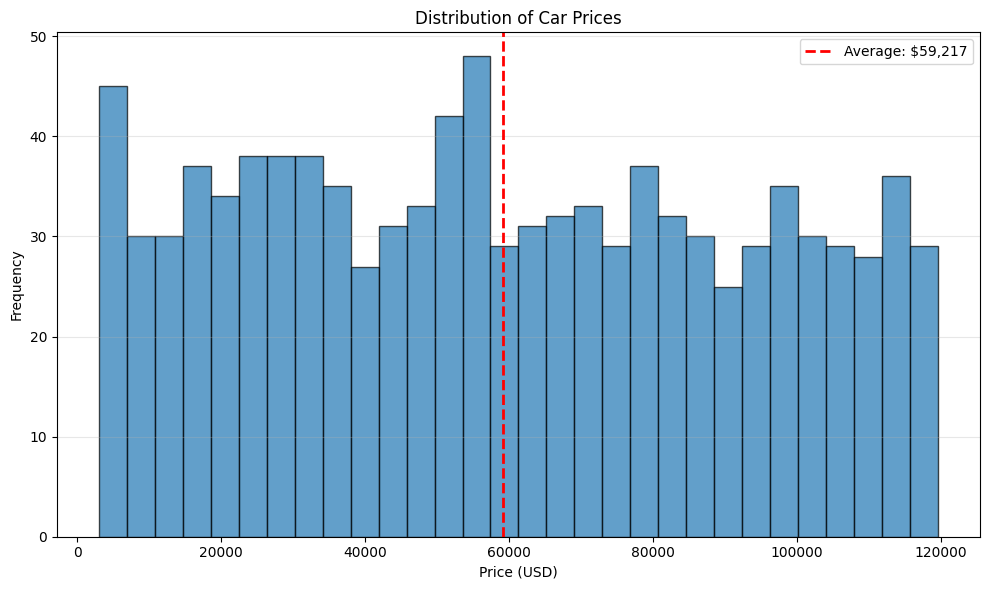

In [7]:
# Calculate price statistics
avg_price = df['Price_USD'].mean()
min_price = df['Price_USD'].min()
max_price = df['Price_USD'].max()

print(f"Average car price: ${avg_price:,.2f}")
print(f"Minimum price: ${min_price:,.2f}")
print(f"Maximum price: ${max_price:,.2f}")
print(f"Price range: ${max_price - min_price:,.2f}")

# Visualization: Histogram of price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Price_USD'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(avg_price, color='red', linestyle='--', linewidth=2, label=f'Average: ${avg_price:,.0f}')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Answer:** The average car price in this dataset is $59,217.25. The prices range from a minimum of $3,028.42 to a maximum of $119,611.94, giving a total price range of $116,583.52. This shows significant variation in car prices, likely reflecting differences in brand, age, condition, and features.

## Question 2: Which car brand/make appears most frequently in the dataset?

Top 10 most common car brands:
Brand
Toyota        118
Ford          110
Volkswagen    107
Mercedes      107
Kia           100
Hyundai        96
BMW            94
Audi           94
Nissan         91
Honda          83
Name: count, dtype: int64

Most common brand: Toyota with 118 cars


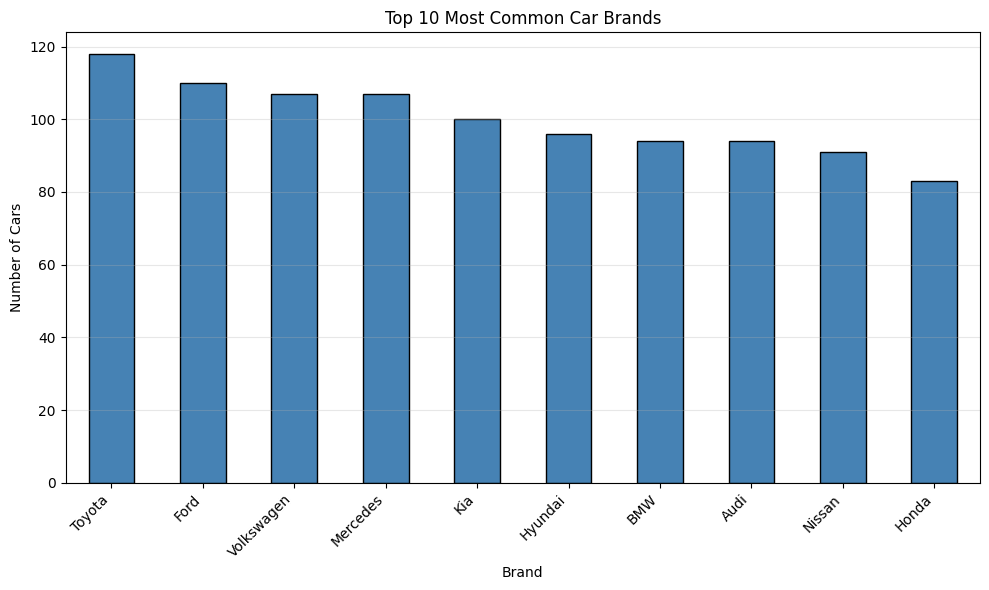

In [8]:
# Find the most common car brands
top_brands = df['Brand'].value_counts().head(10)

print("Top 10 most common car brands:")
print(top_brands)
print(f"\nMost common brand: {top_brands.index[0]} with {top_brands.iloc[0]} cars")

# Visualization: Bar chart of top 10 brands
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Top 10 Most Common Car Brands')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Answer:** Toyota is the most common car brand in the dataset with 118 cars, followed by Ford (110 cars) and Volkswagen and Mercedes (both with 107 cars). Toyota's dominance suggests it's a popular choice in the used car market, likely due to its reputation for reliability and value retention.

## Question 3: How does the average price differ between automatic and manual transmission cars?

Average price by transmission type:
Transmission
Manual       59476.330756
Automatic    58941.038740
Name: Price_USD, dtype: float64

Price difference: $535.29


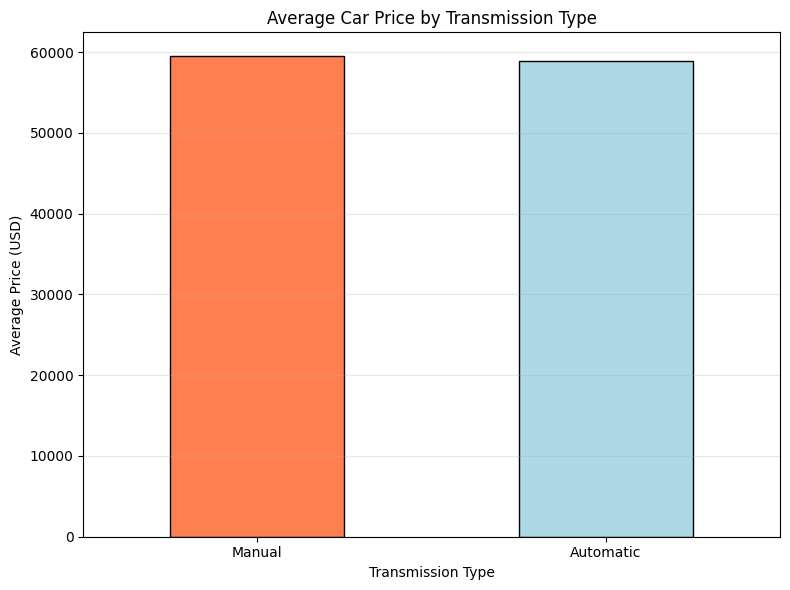

In [9]:
# Compare prices by transmission type
price_by_transmission = df.groupby('Transmission')['Price_USD'].mean().sort_values(ascending=False)

print("Average price by transmission type:")
print(price_by_transmission)
print(f"\nPrice difference: ${price_by_transmission.iloc[0] - price_by_transmission.iloc[1]:,.2f}")

# Visualization: Bar chart comparing transmission prices
plt.figure(figsize=(8, 6))
price_by_transmission.plot(kind='bar', color=['coral', 'lightblue'], edgecolor='black')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price (USD)')
plt.title('Average Car Price by Transmission Type')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Answer:** Manual transmission cars have a slightly higher average price at $59,476.33 compared to automatic transmission cars at $58,941.04. The difference is only $535.29, which is relatively small (less than 1% difference). This suggests that transmission type alone doesn't significantly impact car prices in this dataset.

## Question 4: What is the relationship between car year (age) and mileage?

Correlation between year and kilometers driven: -0.013

Average kilometers driven by year (last 5 years):
Model_Year
2020    105184.388889
2021     93951.000000
2022    105660.535714
2023    113379.333333
2024    108653.341463
Name: Kilometers_Driven, dtype: float64


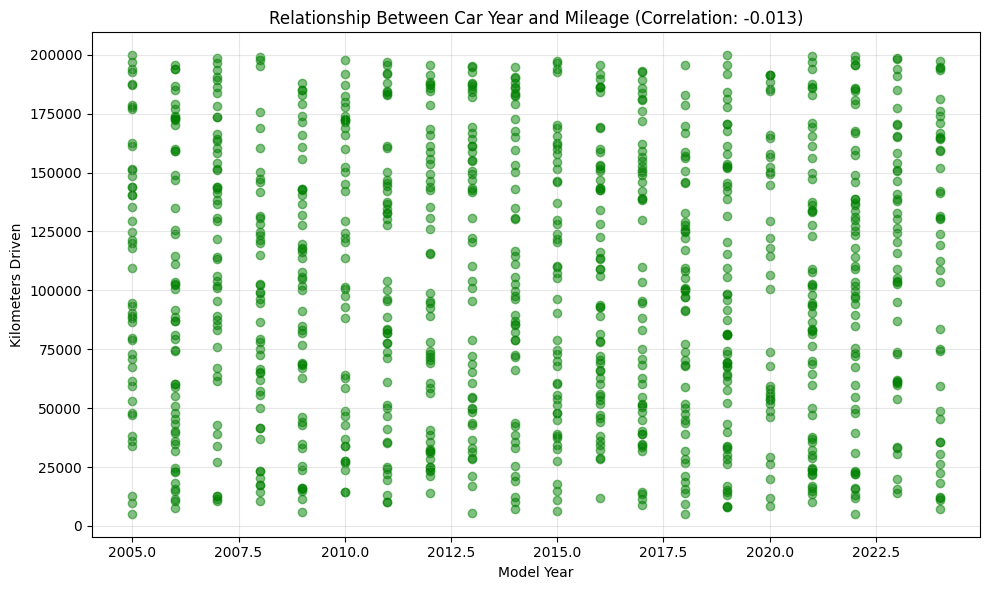

In [10]:
# Analyze relationship between year and mileage
# Calculate correlation
correlation = df['Model_Year'].corr(df['Kilometers_Driven'])
print(f"Correlation between year and kilometers driven: {correlation:.3f}")

# Group by year and show average mileage
avg_km_by_year = df.groupby('Model_Year')['Kilometers_Driven'].mean().sort_index()
print("\nAverage kilometers driven by year (last 5 years):")
print(avg_km_by_year.tail())

# Visualization: Scatter plot with trend
plt.figure(figsize=(10, 6))
plt.scatter(df['Model_Year'], df['Kilometers_Driven'], alpha=0.5, color='green')
plt.xlabel('Model Year')
plt.ylabel('Kilometers Driven')
plt.title(f'Relationship Between Car Year and Mileage (Correlation: {correlation:.3f})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Answer:** There is virtually no correlation between car year and kilometers driven (correlation = -0.013), meaning newer cars don't necessarily have lower mileage. The average kilometers driven for recent years ranges from about 94,000 to 113,000 km. This weak correlation suggests that factors other than age (such as usage patterns or previous owners) play a bigger role in determining how much a car has been driven.

## Question 5: What percentage of cars in the dataset are from each fuel type (Gasoline, Diesel, Electric, Hybrid)?

Fuel type distribution:
Petrol: 27.10%
Hybrid: 25.20%
Electric: 25.20%
Diesel: 22.50%

Most common fuel type: Petrol (27.10%)


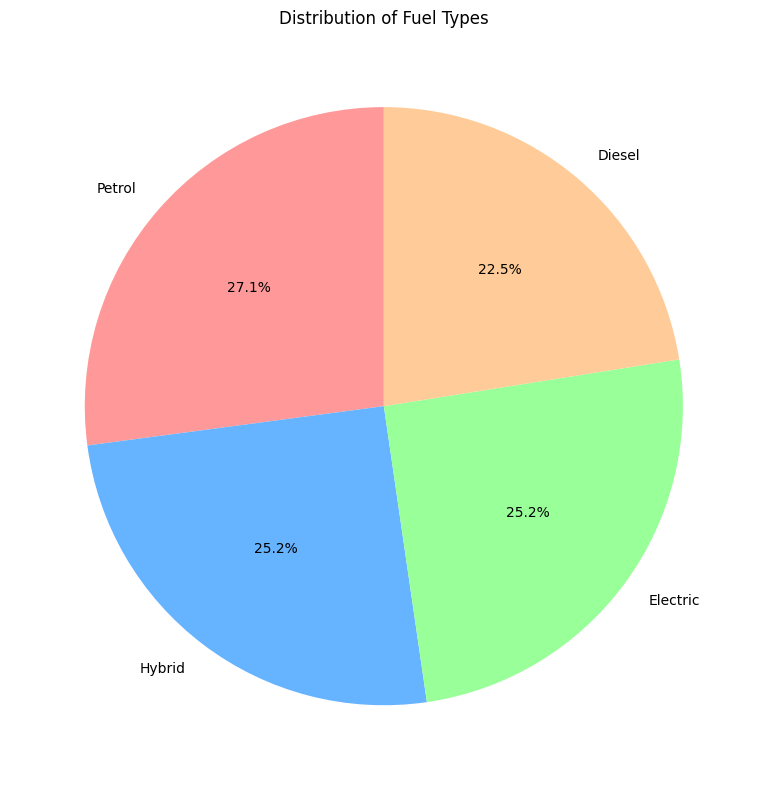

In [11]:
# Calculate fuel type distribution
fuel_percentages = df['Fuel_Type'].value_counts(normalize=True) * 100

print("Fuel type distribution:")
for fuel_type, percentage in fuel_percentages.items():
    print(f"{fuel_type}: {percentage:.2f}%")
    
print(f"\nMost common fuel type: {fuel_percentages.index[0]} ({fuel_percentages.iloc[0]:.2f}%)")

# Visualization: Pie chart of fuel types
plt.figure(figsize=(8, 8))
plt.pie(fuel_percentages, labels=fuel_percentages.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Fuel Types')
plt.tight_layout()
plt.show()

**Answer:** The fuel type distribution is relatively balanced across the dataset: Petrol is the most common at 27.10%, followed by Hybrid and Electric (both at 25.20%), and Diesel at 22.50%. This fairly even distribution suggests the used car market includes a diverse mix of traditional and alternative fuel vehicles, reflecting the transition toward more environmentally-friendly options.